# House Prices - Advanced Regression Techniques

- Utilizaando os [dados disponíveis no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - Dataset de competição
    - A avaliação será através do erro quadrático médio

## Parte 1
- O objetivo desta parte é criar um primeiro modelo simples para verificar o resultado inicial e depois planejar como melhorar. Para isso é necessário:
    - Retirar os valores vazios
    - Eliminar as colunas de texto
    - Utilizar algoritmos iniciais para testar 
    - Avaliar os resultados obtidos

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando os datasets de treino
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
# Visualizando essa base
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# Visualizando essa base
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
# Retornando o shape da base
treino.shape

(1460, 81)

In [6]:
# Retornando o shape da base
teste.shape

(1459, 80)

In [7]:
# Visualizando as informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Visualizando as informações
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Explorando os dados

In [9]:
# Visualizando porcentagem de valores vazios por coluna
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [11]:
# Visualizando porcentagem de valores vazios por coluna
(teste.isnull().sum()/teste.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
MasVnrType      0.612748
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
dtype: float64

In [12]:
# Eliminando as colunas com mais de 10% de valores vazios
removeCol = treino.columns[treino.isnull().sum()/treino.shape[0] > 0.1]
removeCol

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [13]:
# Eliminando as mesmas colunas em treino e teste
treino = treino.drop(removeCol,axis=1)
teste = teste.drop(removeCol,axis=1)

In [14]:
# Retirando os valores vazios
treino = treino.fillna(-1)
teste = teste.fillna(-1)

In [17]:
# Verificando porcentagem de valores vazios novamente
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(3)

Id             0.0
GarageYrBlt    0.0
Fireplaces     0.0
dtype: float64

In [18]:
# Verificando porcentagem de valores vazios novamente
(teste.isnull().sum()/teste.shape[0]).sort_values(ascending=False).head(3)

Id            0.0
HeatingQC     0.0
Fireplaces    0.0
dtype: float64

In [20]:
# Selecionando somente colunas numéricas
colTreiNum = treino.columns[treino.dtypes != 'object']
colTreiNum

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
# Selecionando somente colunas numéricas
colTestNum = teste.columns[teste.dtypes != 'object']
colTestNum

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [22]:
# Nova base com valores numericos
treino = treino.loc[:,colTreiNum]
teste = teste.loc[:,colTestNum]

## Criando o modelo

- Separando em treino e teste
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [24]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [25]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Algoritmos utilizados

- [Regressão Linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [26]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [27]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [28]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

- [Árvore de Regressão](https://scikit-learn.org/stable/modules/tree.html#regression)

In [29]:
# Importando a árvore de regressão
from sklearn import tree

In [30]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [31]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

- [KNN-Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)

In [32]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [33]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [34]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

### Avaliando os dados
- Erro médio absoluto
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- Erro quadrático médio
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [36]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [37]:
# Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [40]:
# Avaliando o erro da regressão linear
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23763.18739306408
1533982883.4448242


In [41]:
# Avaliando o erro da árvore de decisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

27416.441908713692
2058716788.4087136


In [42]:
# Avaliando o erro do knn
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33273.08298755187
2733937586.841286


### Visualizando a relação do y_test com as previsões feitas
- Para isso vamos utilizar o matplotlib
    - https://matplotlib.org/

In [43]:
# Importando o matplotlib
import matplotlib.pyplot as plt

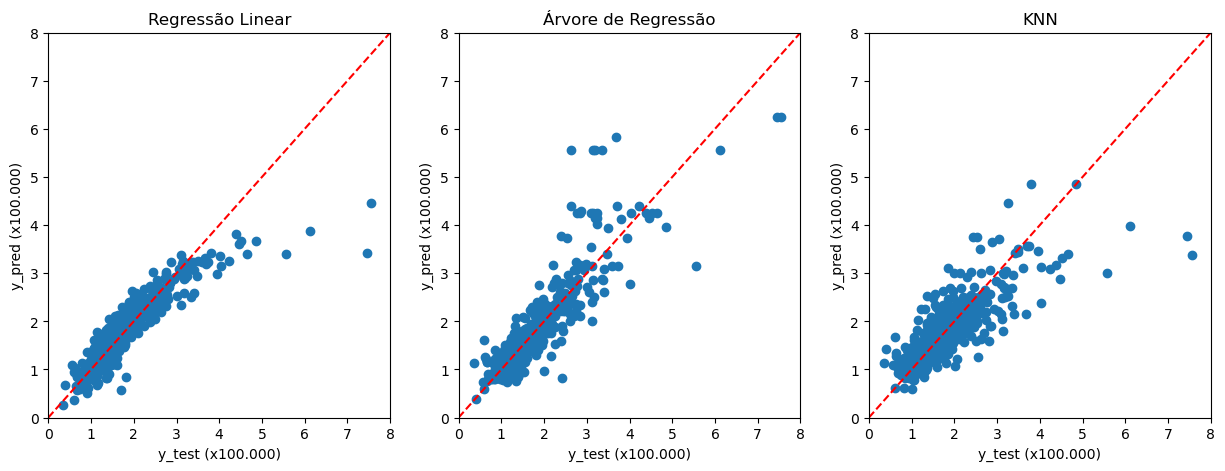

In [46]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')

ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')

ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

- Regressão Linear apresenta menor erro quadrático médio

## Aplicando modelo em teste

In [47]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [48]:
# Utilizando a Regressão Linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [49]:
# Adicionando a coluna de previsão na base
teste['SalePrice'] = y_pred

In [52]:
# Selecionando apenas a coluna de Id e SalePrice para fazer o envio
resultado1 = teste[['Id', 'SalePrice']]

In [53]:
# Exportando para um csv
resultado1.to_csv('resultado1.csv', index=False)

- **Resultado**
<img src="pkgImagens/resultado1.png" width=900>